In [1]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2017)
    

In [3]:
x_train=np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train=np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],[2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

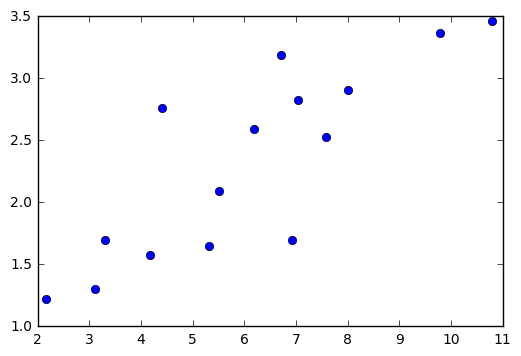

In [4]:
# 图
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train,y_train,"bo")


In [5]:
# 转为Tensor 
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
# 定义参数 w和b
w=Variable(torch.randn(1),requires_grad=True)# 随机初始化
b=Variable(torch.zeros(1),requires_grad=True) # 使用0 进行初始化
# 构建线性回归模型
x_train=Variable(x_train)
y_train=Variable(y_train)
def linear_model(x):
    return x*w +b



In [8]:
y_=linear_model(x_train)


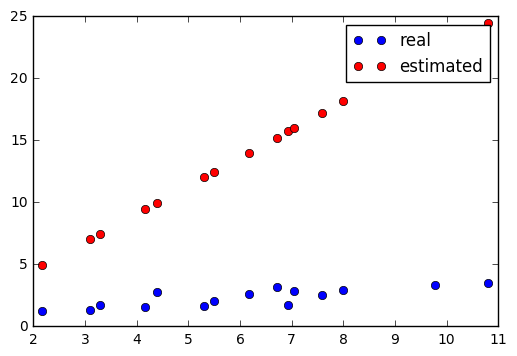

In [9]:
# 经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo",label="real")
plt.plot(x_train.data.numpy(),y_.data.numpy(),"ro",label="estimated")
plt.legend()


In [11]:
# 计算误差
def get_loss(y_,y):
    return torch.mean((y_  - y_train)**2)
loss=get_loss(y_,y_train)
loss

tensor(153.3520, grad_fn=<MeanBackward1>)

In [12]:
#接下来看一下w和b 的梯度，得益于pytorch 的自动求导，我们不需要手动计算梯度。
# 自动 求导
loss.backward()
print(w.grad)
print(b.grad)

tensor([161.0043])
tensor([22.8730])


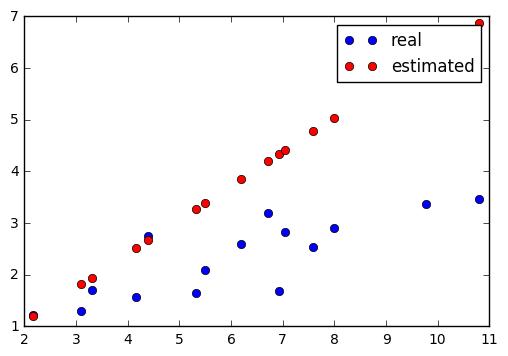

In [13]:
# 更新一次参数
w.data=w.data-1e-2*w.grad.data
b.data=b.data-1e-2*b.grad.data
y_=linear_model(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo",label="real")
plt.plot(x_train.data.numpy(),y_.data.numpy(),"ro",label="estimated")
plt.legend()

In [23]:
# 一次更新并没有特别好的拟合蓝色的真实值，需要再进行几次更新
for e in range(10): # 进行10次更新
    y_=linear_model(x_train)
    loss=get_loss(y_,y_train)
    w.grad.zero_() # 记得归0 梯度
    b.grad.zero_() # 记得归0 梯度
    loss.backward()
    w.data=w.data-1e-2*w.grad.data # 更新w
    b.data=b.data-1e-2*b.grad.data # 更新b
    print(loss.data)
    
    

tensor(0.3281)
tensor(0.3273)
tensor(0.3265)
tensor(0.3257)
tensor(0.3249)
tensor(0.3241)
tensor(0.3233)
tensor(0.3225)
tensor(0.3217)
tensor(0.3209)


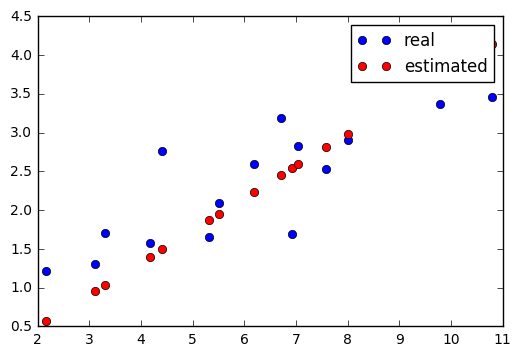

In [24]:
y_=linear_model(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo",label="real")
plt.plot(x_train.data.numpy(),y_.data.numpy(),"ro",label="estimated")
plt.legend()

In [27]:
#(2 ) 多项式回顾模型
# 定义一个多变量函数，这个函数是一个三次的多项式
w_target=np.array([0.5,3,2.4])
b_target=np.array([0.9])
f_res='y={:.2f}+{:.2f}*x+{:2f}*x^2+{:.2f}*x^3'.format(b_target[0],w_target[0],w_target[1],w_target[2]) # 打印出函数的式子
f_res

'y=0.90+0.50*x+3.000000*x^2+2.40*x^3'

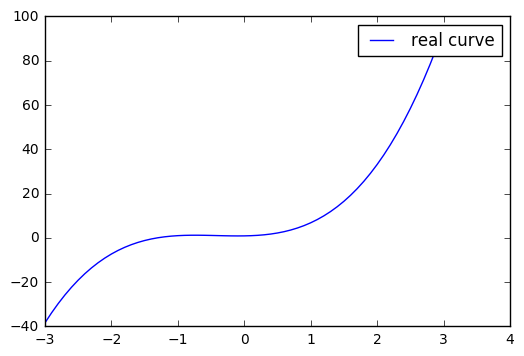

In [31]:
# 画出这个函数的曲线
x_sample=np.arange(-3,3.1,0.1)
y_sample=b_target[0]+w_target[0]*x_sample+w_target[1]*x_sample**2+w_target[2]*x_sample**3
w_target[2]*x_sample**3
plt.plot(x_sample,y_sample,label="real curve")
plt.legend()
                                                                       

In [34]:
# 构建数据x和y 
# x 是一个如下矩阵，[x,x^2,x^3]
# y 是一个函数的结果[y]
x_train=np.stack([x_sample**i for i in range(1,4)],axis=1)
x_train=torch.from_numpy(x_train).float() # 转换为float tensor
y_train=torch.from_numpy(y_sample).float().unsqueeze(1) #  转为float tensor

# 接着要优化这个函数里面的wi
x_train.shape

torch.Size([61, 3])

torch.Size([3, 1])


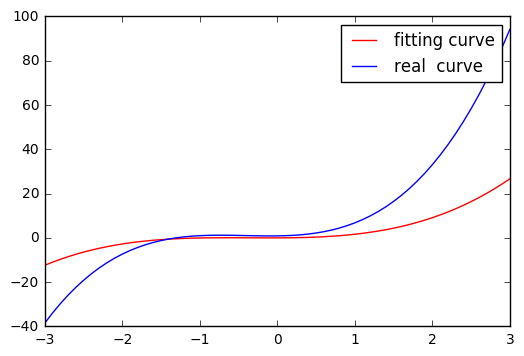

In [35]:
# 定义 参数和模型
w= Variable(torch.randn(3,1),requires_grad=True)
print(w.shape)
b=Variable(torch.zeros(1),requires_grad=True)
# 将x和y 转为Variable 
x_train=Variable(x_train)
y_train=Variable(y_train)
def multi_linear(x):
    return torch.mm(x,w)+b

# 画出更新前的模型和 真实的模型
y_pred=multi_linear(x_train)
plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label="fitting curve", color="r")
plt.plot(x_train.data.numpy()[:,0],y_sample,label="real  curve",color="b")
plt.legend()


In [36]:
# 可以计算一下这两条曲线之间的误差，
loss=get_loss(y_pred,y_train)
print(loss)

tensor(447.3372, grad_fn=<MeanBackward1>)


In [37]:
# 自动求导
loss.backward()

In [38]:
# 查看一下w和b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -60.7756],
        [ -81.7448],
        [-401.0452]])
tensor([-15.4545])


In [39]:
# 更新参数
w.data=w.data-0.001*w.grad.data
b.data=b.data-0.001* b.grad.data


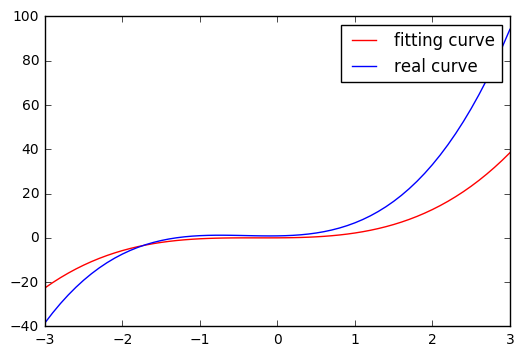

In [41]:
# 画出更新一次之后的模型
y_pred=multi_linear(x_train)
plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label="fitting curve",color="r")
plt.plot(x_train.data.numpy()[:,0],y_sample,label="real curve",color="b")
plt.legend()

In [44]:
# 因为只更新了一次，所以两条曲线之间仍然有差异，我们进行100次迭代
for e in range(100):
    y_pred=multi_linear(x_train)
    loss=get_loss(y_pred,y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    # 更新参数
    w.data=w.data-0.001*w.grad.data
    b.data=b.data-0.001* b.grad.data
    if (e+1) %20==0:
        print("epoch {}, loss :{:.5f}".format(e+1,loss.data))
    

epoch 20, loss :5.37627
epoch 40, loss :1.32816
epoch 60, loss :0.38091
epoch 80, loss :0.15742
epoch 100, loss :0.10293


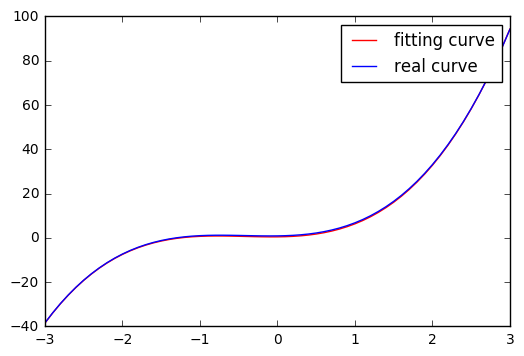

In [45]:
# 画出更新后的结果
y_pred=multi_linear(x_train)
plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label="fitting curve",color="r")
plt.plot(x_train.data.numpy()[:,0],y_sample,label="real curve",color="b")
plt.legend()

In [ ]:
#经过100次 更新，可以看到拟合线和真实线重合了